In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt

In [16]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [17]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [18]:
x=data.data
y=data.target

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [20]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [21]:
L.fit(x_train,y_train)#model train kiya

LinearRegression()

In [22]:
y_pred=L.predict(x_test)#predict vale () ko use krke test bale data pay prediction kiya

In [23]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [24]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [26]:
from sklearn.model_selection import cross_val_score



X = data.data  # Features
y = data.target  # Target labels

model=Ridge()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x, y, cv=5)  # 'cv=5' indicates 5-fold cross-validation

# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)

# Print the average of the cross-validation scores
print("Average cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.32166461 0.44048456 0.42210354 0.42466129 0.44196086]
Average cross-validation score: 0.410174971340889


In [27]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [29]:
R.fit(x_train,y_train)#x_test for evaluating thats by we not taken it

Ridge(alpha=0.0001)

In [30]:
y_pred1=R.predict(x_test)

In [31]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.518973263588495
RMSE 48.718937001819555


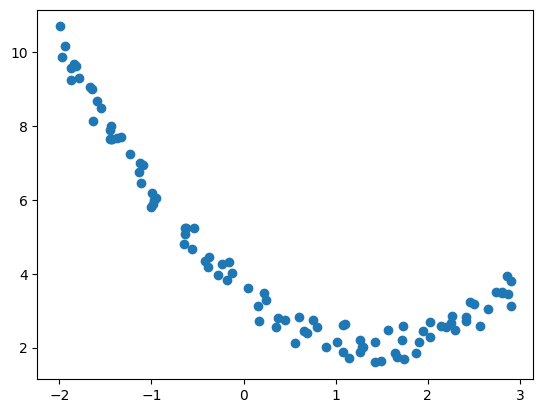

In [32]:
#generate a data set
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.rand(m,1)
plt.scatter(x1,x2)
plt.show()

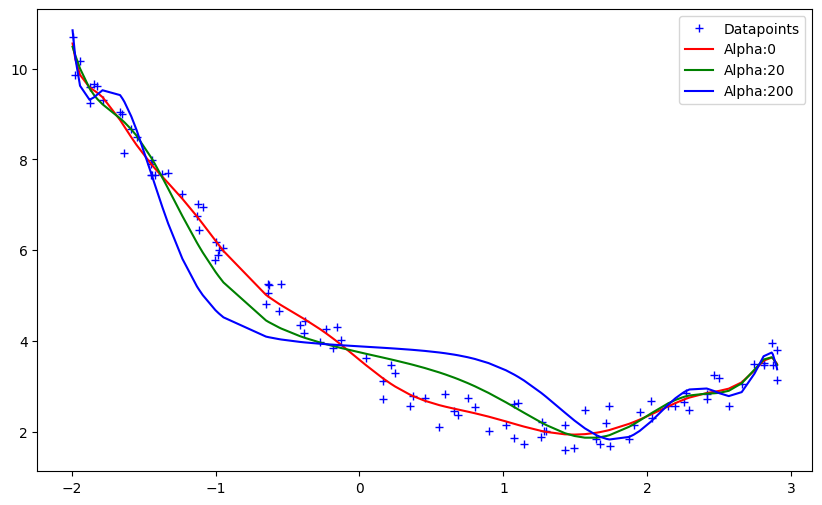

In [42]:
#iske upar  16 degree polynomial regression lga diya
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model=Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas=[0,20,200]# 0 pay lr ki tarah perform krega ,20 pay sahi work krega ,200 pay over fit rhega point kay pass jane ka try krega
cs=['r','g','b']#color for line
#plot the diagram
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha,c in zip(alphas,cs):
    preds=get_preds_ridge(x1,x2,alpha)
    #plot
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha:{}'.format(alpha))

plt.legend()
plt.show()
    